<h1><center>Regression Machine Learning Case
Study Project
</center></h1>

<h4>About this Notebook</h4>
In this notebook, I will solve a predictive modeling machine learning problem end-to-end.
I will:

> Use data transforms to improve model performance.

> Use algorithm tuning to improve model performance.

> Use ensemble methods and tuning of ensemble methods to improve model performance.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#href0">Understanding the Data</a></li>
        <li><a href="#href1">Importing Necessary Libraries</a></li>
        <li><a href="#href2">Reading in the Data</a></li>
        <li><a href="#href3">Summarizing the Data</a></li>
        <li><a href="#href4">Exploratory Data Visualization</a></li>
        <li><a href="#href5">Creating a Validation Dataset</a></li>
        <li><a href="#href6">Evaluate Algorithms: Standardization</a></li>
        <li><a href="#href7">Tuning</a></li>
        <li><a href="#href8">Ensemble Methods</a></li>
         <li><a href="#href9">Tuning Ensemble Methods</a></li>
        <li><a href="#href10">Finalizing the Chosen Model</a></li>
        <li><a href="#href11">Visualizing Model Performance</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="#href0">Understanding the Data</h2>

### `FuelConsumption.csv`:
The dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

<h2 id=#href1>Importing Necessary Libraries</h2>

In [21]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from numpy import arange
from matplotlib import pyplot
#from pandas import read_csv
#from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [15]:
import seaborn as sns
import numpy as np

<h2 id="#href2">Reading the data in</h2>

In [3]:
df = pd.read_csv(r'C:\Users\eduna\Documents\IBM-Data-Science-Professional-Certification-master\08 Machine Learning with Python\Week 2 (Linear & Non Linear Regression)\Lab 3 - Polynomial Regression\FuelConsumptionCo2.csv')


<h2 id="#href3">Summarizing the data</h2>

In [4]:
df.shape

(1067, 13)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Statistical summary

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Class distribution

In [ ]:
# class distribution
df.groupby('MAKE').size().sort_values(ascending=False)


<h2 id="#href4">Exploratory Data Vizualization</h2>

In [ ]:
ax = sns.boxplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)
ax = sns.swarmplot(x='CYLINDERS', y='CO2EMISSIONS', data=df, color='.25')

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

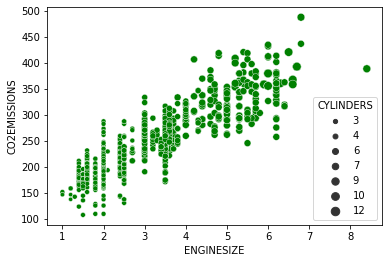

In [9]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, size='CYLINDERS', color='green')

<AxesSubplot:xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

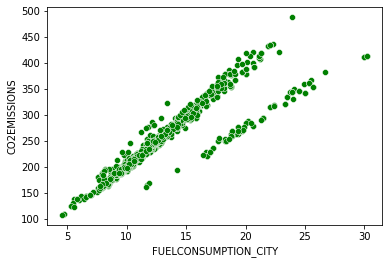

In [10]:
sns.scatterplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df, color='green')

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

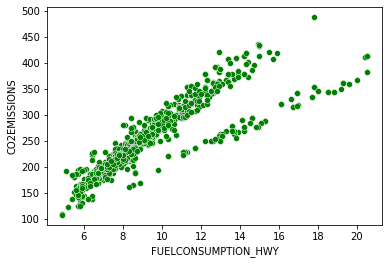

In [24]:
sns.scatterplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df, color='green')

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

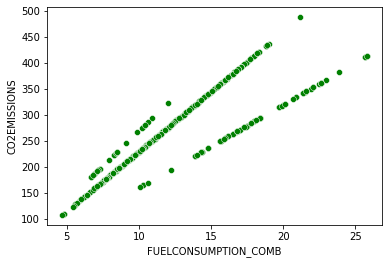

In [11]:
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df, color='green')

Multivariate plots

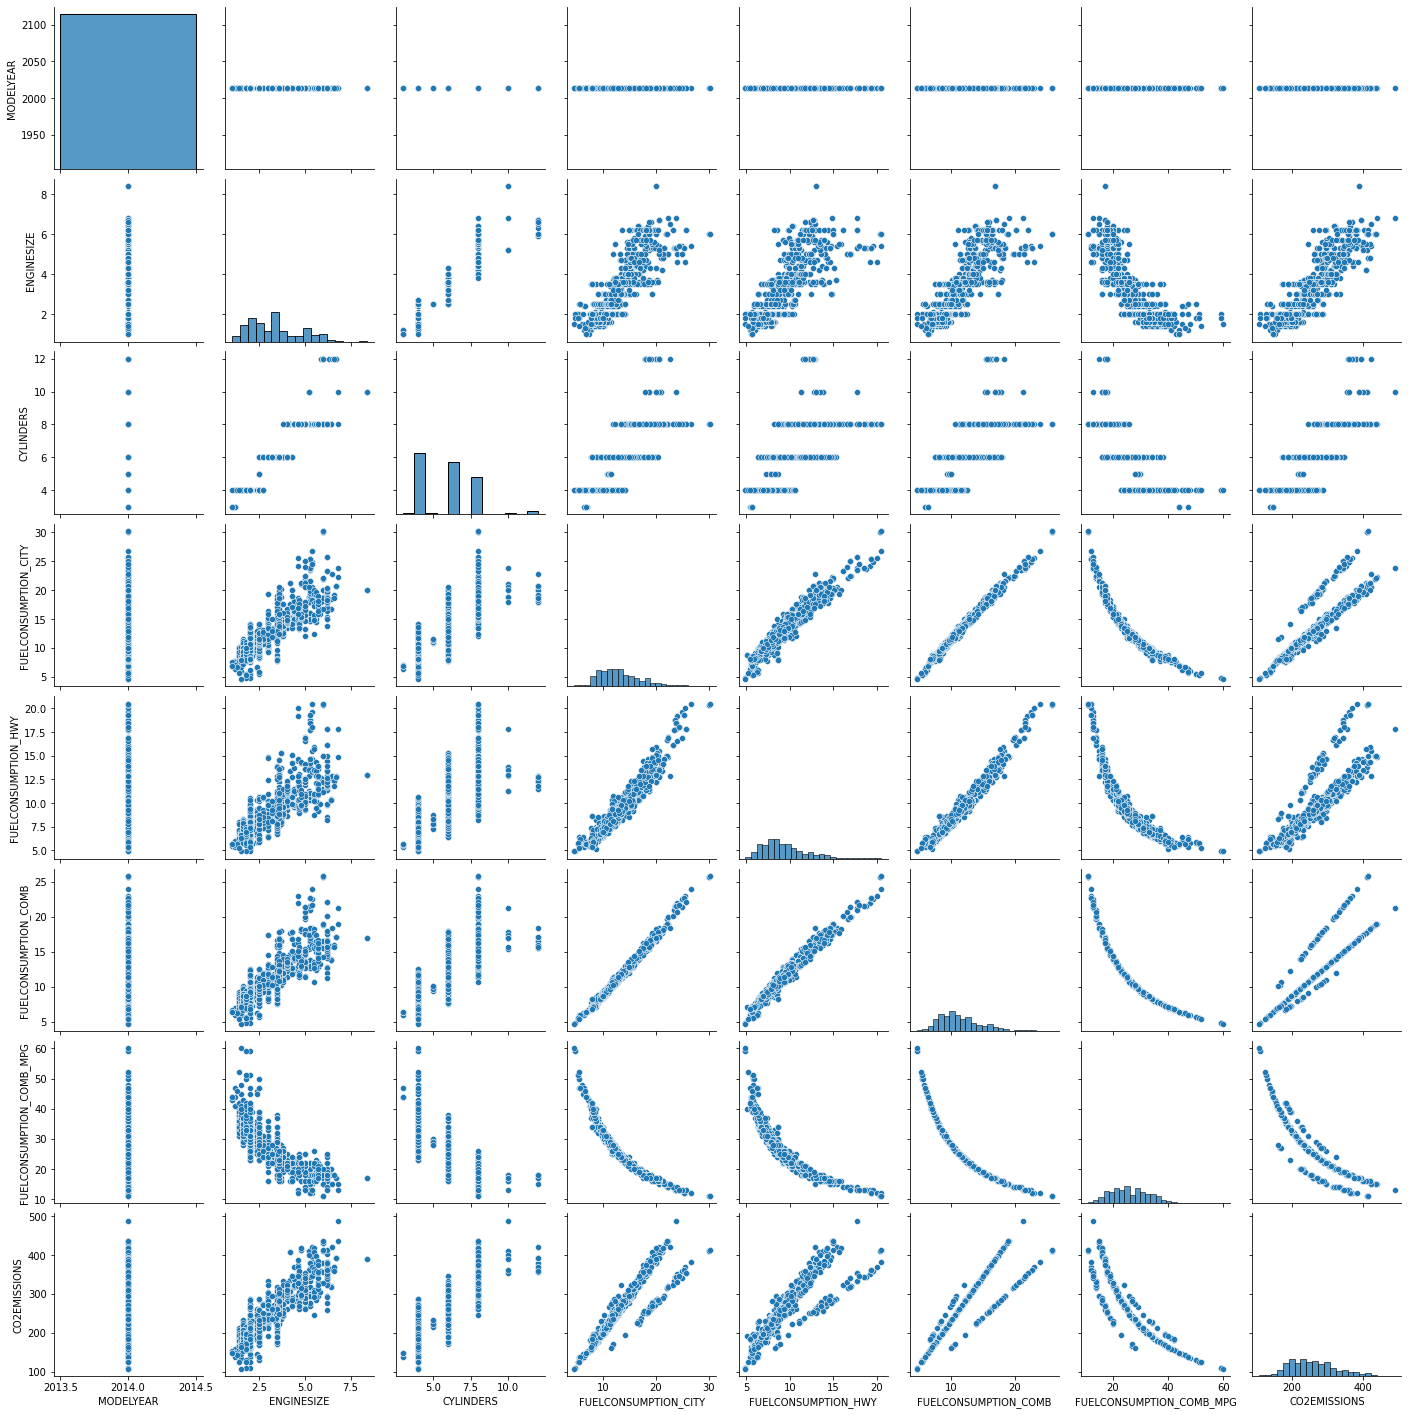

In [12]:
sns.pairplot(df)

<h2 id="#href5">Creating a validation dataset</h2>

In [16]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = df[['CO2EMISSIONS']]

X = np.asanyarray(x)
Y = np.asanyarray(y)

In [17]:
# Split-out validation dataset
#array = df.values
#X = array['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
#Y = array['CO2EMISSIONS']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [23]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Spot-checking several models

In [40]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -595.677823 (123.327411)
LASSO: -596.766068 (127.992436)
EN: -606.256835 (137.282774)
KNN: -222.124619 (92.179217)
CART: -197.112264 (109.201675)
SVR: -763.796832 (235.310676)


So what we have here are the means (and standard deviations) of the MSE of the models. Recall that an MSE of 0 is perfect so it looks like CART and KNN are the best models with MSEs of -197 & -222 respectively

Let’s take a look at the distribution of the scores across the cross validation folds

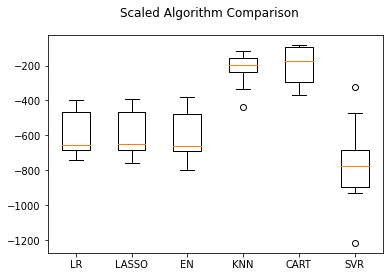

In [41]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


<h2 id="#href6">Evaluate Algorithms: Standardization</h2>
We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [42]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -595.677823 (123.327411)
ScaledLASSO: -596.345540 (122.430894)
ScaledEN: -633.950140 (127.658429)
ScaledKNN: -215.018234 (99.406047)
ScaledCART: -206.290793 (132.816765)
ScaledSVR: -796.182430 (280.741269)


With standardized data, note the reduction in the MSEs of KNN (-215). CART's increased to -206

 Let's now visualize the differences in algorithm performance on the standardized dataset.

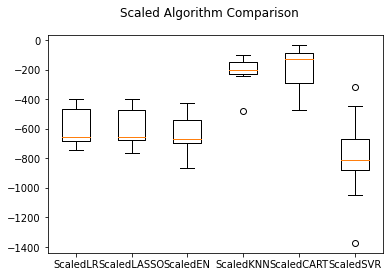

In [29]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h2 id="#href7">Improve Results With Tuning</h2>
We know from the results in the previous section that CART and KNN achieves good results on a scaled
version of the dataset. But can it do better. The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we
can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range
covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross
validation on a standardized copy of the training dataset.

In [43]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -155.687155 using {'n_neighbors': 1}
-155.687155 (103.567548) with: {'n_neighbors': 1}
-171.722902 (114.709235) with: {'n_neighbors': 3}
-215.113755 (99.258929) with: {'n_neighbors': 5}
-247.786721 (89.433880) with: {'n_neighbors': 7}
-284.544147 (93.830647) with: {'n_neighbors': 9}
-313.645761 (106.007611) with: {'n_neighbors': 11}
-318.857947 (116.205885) with: {'n_neighbors': 13}
-329.576505 (126.435133) with: {'n_neighbors': 15}
-349.776729 (133.567559) with: {'n_neighbors': 17}
-365.056846 (127.922618) with: {'n_neighbors': 19}
-360.343087 (123.262048) with: {'n_neighbors': 21}


We see now that the best for k (n neighbors) is 1 providing a mean squared error of
-155.687155, the best so far (Even besting CART's -192)

<h2 id="#href8">Ensemble Methods</h2>
Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
> Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).

> Bagging Methods: Random Forests (RF) and Extra Trees (ET).


In [38]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -407.227038 (84.027696)
ScaledGBM: -171.062250 (51.455583)
ScaledRF: -142.553940 (81.841922)
ScaledET: -78.729345 (57.469418)


Visualizing the differences in ensemble algorithm performance on standardized
dataset.

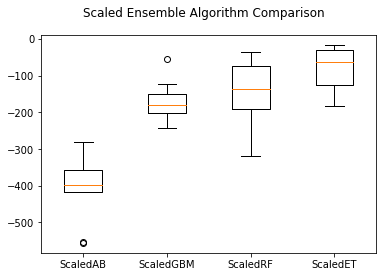

In [39]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ET and RF takes the gold here with MSEs even better than KNN's. Let's see if we can improve even more by tuning

<h2 id="#href9">Tuning Ensemble Methods</h2>
The default number of boosting stages to perform (n estimators) is 100. This is a good
candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will
look at tuning the number of stages for gradient boosting. Below we define a parameter grid
n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross validation.


In [45]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train.ravel())

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -77.935129 using {'n_estimators': 400}
-85.209207 (63.769145) with: {'n_estimators': 50}
-79.530353 (62.642050) with: {'n_estimators': 100}
-78.058726 (58.396391) with: {'n_estimators': 150}
-79.327213 (62.432027) with: {'n_estimators': 200}
-79.436543 (60.384024) with: {'n_estimators': 250}
-78.765679 (59.903712) with: {'n_estimators': 300}
-79.890318 (59.351008) with: {'n_estimators': 350}
-77.935129 (59.524427) with: {'n_estimators': 400}


By tuning ET we went from -78 to -77 MSE

<h2 id="#href10">Finalizing the Chosen Model</h2>
In this section, I finalize the Extra Trees Regressor model and evaluate it on the hold out
validation dataset. First I need to prepare the model and train it on the entire training dataset.
This includes standardizing the training dataset before training.


In [47]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(n_estimators=400)
model.fit(rescaledX, Y_train.ravel())


ExtraTreesRegressor(n_estimators=400)

In [48]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

73.57719310747665


In [50]:
from sklearn.metrics import r2_score
r2_score(Y_validation, predictions)

0.979375045521556

Finally, we have a satisfactory model with an impressive r2 and reasonably low MSE. 
Let's visualize the fit of the model

<h2 id="#href11">Visualizing the performance of the model</h2>

Lets write a function to plot the distribution of the test values and the values predicted by the model on the same plot

In [53]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('response variable')
    plt.ylabel('distribution')

    plt.show()
    plt.close()

c:\Users\eduna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\eduna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


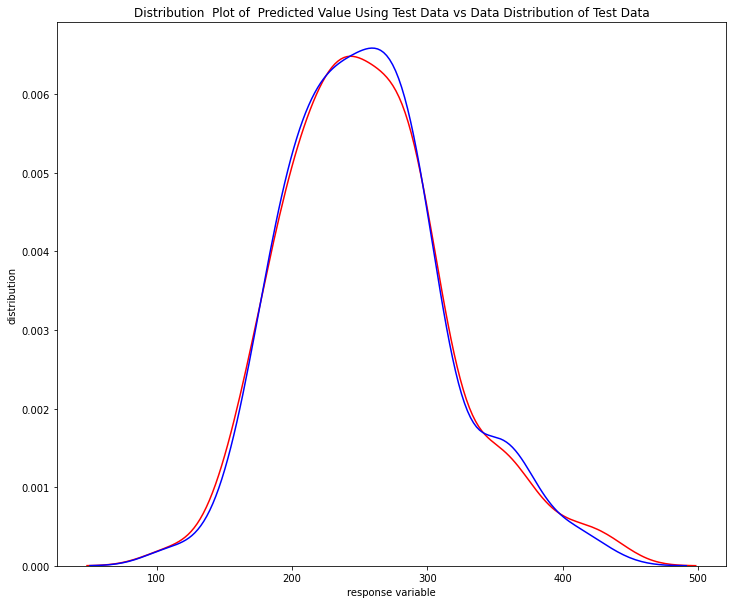

In [54]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_validation, predictions,"Actual Values (Test)","Predicted Values (Test)",Title)